In [327]:
ff_file_path = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_128_ff_t_18458.txt'
print('ff file path:', ff_file_path)
ff_file_path2 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_128_ff_t_18480_2.txt'
print('ff file path2:', ff_file_path2)

ff file path: /Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_128_ff_t_18458.txt
ff file path2: /Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_128_ff_t_18480_2.txt


In [328]:
# Function to parse the FastFlow execution file
def parse_fastflow_file(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()
    
    blockSizes = {}
    
    compression_results = {}
    decompression_results = {}
    
    for i, line in enumerate(lines):
        if 'BLOCKSIZE' in line:
            block_size = int(line.split(' ')[3].strip())
            if block_size != 2:
                if block_size not in blockSizes:
                    blockSizes[int(block_size/2)] = {'compression': {}, 'decompression': {}}
                    blockSizes[int(block_size/2)]['compression'] = compression_results
                    blockSizes[int(block_size/2)]['decompression'] = decompression_results
                    compression_results = {}
                    decompression_results = {}

        if 'decompression' in line:
            l = int(line.split('-l')[1].split()[0])
            w = int(line.split('-w')[1].split()[0])
            time = float(lines[i + 1].split('Time:')[1].split('(')[0].strip())
            time = round(time, 1)
            
            if l not in decompression_results:
                decompression_results[l] = []
            decompression_results[l].append((w, time))
        
        elif 'compression' in line:
            l = int(line.split('-l')[1].split()[0])
            w = int(line.split('-w')[1].split()[0])
            time = float(lines[i + 1].split('Time:')[1].split('(')[0].strip())
            time = round(time, 1)
            
            if l not in compression_results:
                compression_results[l] = []
            compression_results[l].append((w, time))
    
    # Store the last block's results
    blockSizes[block_size] = {'compression': {}, 'decompression': {}}
    blockSizes[block_size]['compression'] = compression_results
    blockSizes[block_size]['decompression'] = decompression_results

    return blockSizes

# Example usage
ff_file_path = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_128_ff_t_18458.txt'
blockSizes = parse_fastflow_file(ff_file_path)

# Accessing compression results for a specific block size
block_size = 2
compression_results = blockSizes.get(block_size, {}).get('compression', {})
print(f"Compression results for block size={block_size}: {compression_results}")

# Accessing decompression results for a specific block size
decompression_results = blockSizes.get(block_size, {}).get('decompression', {})
print(f"Decompression results for block size={block_size}: {decompression_results}")

# Accessing all the elements of compression for l=1 to obtain a list of times
l_value = 1
compression_times_for_l = [time for w, time in compression_results.get(l_value, [])]
print(f"Compression times for l={l_value}: {compression_times_for_l}")

Compression results for block size=2: {1: [(1, 7220.0), (2, 3957.4), (4, 2433.7), (8, 1803.8), (16, 1281.9), (20, 1332.9), (22, 1234.7), (24, 1151.4), (26, 1245.2), (27, 1183.4), (28, 1159.1), (29, 1159.8), (30, 1146.3), (31, 1193.6), (32, 1230.9)], 2: [(1, 7109.3), (2, 3954.3), (4, 2353.3), (8, 1549.0), (16, 1271.3), (20, 1327.7), (22, 1224.9), (24, 1160.8), (26, 1175.6), (27, 1163.0), (28, 1216.5), (29, 1147.0), (30, 1224.8), (31, 1152.3), (32, 1233.9)], 4: [(1, 7131.0), (2, 3965.5), (4, 2398.9), (8, 1570.0), (16, 1291.7), (20, 1384.9), (22, 1216.7), (24, 1167.3), (26, 1202.8), (27, 1231.0), (28, 1220.6), (29, 1178.7), (30, 1191.0), (31, 1261.7), (32, 1244.4)], 8: [(1, 7143.2), (2, 3960.3), (4, 2324.7), (8, 1608.0), (16, 1287.7), (20, 1315.1), (22, 1270.9), (24, 1224.3), (26, 1172.6), (27, 1187.8), (28, 1210.5), (29, 1215.0), (30, 1204.2), (31, 1180.5), (32, 1243.8)]}
Decompression results for block size=2: {1: [(1, 1682.9), (2, 1273.9), (4, 1116.8), (8, 1046.9), (16, 1113.0), (20, 1

In [329]:
blockSizes2 = parse_fastflow_file(ff_file_path2)

# calculate the average  time of the 2 structure and save the result in a new structure
blockSizes_avg = {}
# the two structure have the sime structure, for each value i want to add the two values and divide by 2

for block_size in blockSizes:
    blockSizes_avg[block_size] = {'compression': {}, 'decompression': {}}
    for l in blockSizes[block_size]['compression']:
        blockSizes_avg[block_size]['compression'][l] = []
        for i in range(len(blockSizes[block_size]['compression'][l])):
            blockSizes_avg[block_size]['compression'][l].append((blockSizes[block_size]['compression'][l][i][0], (blockSizes[block_size]['compression'][l][i][1] + blockSizes2[block_size]['compression'][l][i][1])/2))
    for l in blockSizes[block_size]['decompression']:
        blockSizes_avg[block_size]['decompression'][l] = []
        for i in range(len(blockSizes[block_size]['decompression'][l])):
            blockSizes_avg[block_size]['decompression'][l].append((blockSizes[block_size]['decompression'][l][i][0], (blockSizes[block_size]['decompression'][l][i][1] + blockSizes2[block_size]['decompression'][l][i][1])/2))

In [330]:
sequential_time_comp = 6725

/var/folders/r7/204yvtz15gq3t73qg5kdwc_00000gn/T/ipykernel_3129/2121444291.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab10')


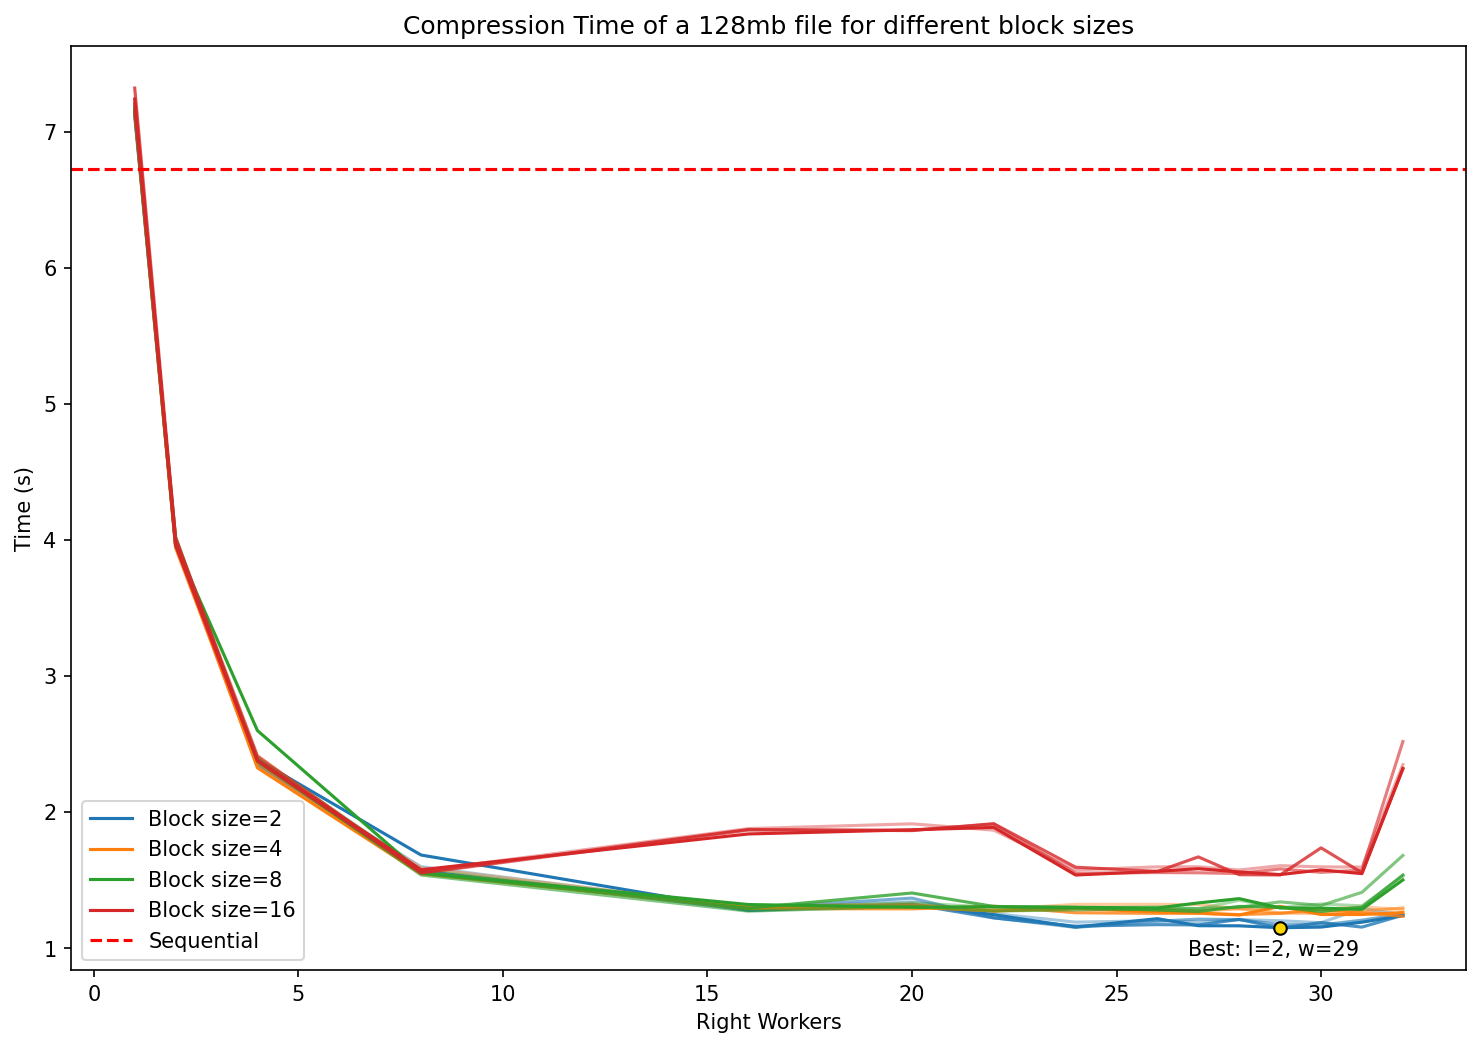

In [331]:
import matplotlib.pyplot as plt
import numpy as np

# Define a color map
color_map = plt.cm.get_cmap('tab10')

# Function to adjust the opacity of the base color
def adjust_opacity(color, opacity):
    return np.append(color, opacity)

# Function to plot compression results for all block sizes
def plot_compression_results(blockSizes, sequential_time_comp):
    # Increase the figure size and DPI for higher quality
    fig, ax = plt.subplots(figsize=(12, 8), dpi=150)
    legend_labels = set()  # Set to track added block sizes

    best_time = float('inf')
    best_l = None
    best_w = None
    # Iterate over block sizes
    for idx, (block_size, results) in enumerate(blockSizes.items()):
        compression_results = results.get('compression', {})
        base_color = color_map(idx % 10)  # Get a color from the color map

        # Variables to track the best point

        for i, (l, results) in enumerate(compression_results.items()):
            ws, times = zip(*results)
            times = [t / 1000 for t in times]  # Convert times from ms to seconds
            opacity = 1 - (i * 0.2)  # Adjust opacity for each l
            color_with_opacity = adjust_opacity(base_color[:3], opacity)
            
            # Add label only if block size is not in legend_labels
            label = f"Block size={block_size}" if block_size not in legend_labels else None
            ax.plot(ws, times, label=label, color=color_with_opacity)
            
            # Add block size to legend_labels
            legend_labels.add(block_size)
            
            # Find the best point
            min_time = min(times)
            if min_time < best_time:
                best_time = min_time
                best_l = l
                best_w = ws[times.index(min_time)]

    # Highlight the absolute best point
    ax.scatter(best_w, best_time, color='gold', edgecolor='black', zorder=5)
    ax.annotate(f"Best: l=2, w=29", (best_w, best_time), textcoords="offset points", xytext=(-3,-13), ha='center')

    # Add a horizontal line for the sequential time (converted to seconds)
    ax.axhline(y=sequential_time_comp / 1000, color='r', linestyle='--', label='Sequential')

    ax.set_xlabel("Right Workers")
    ax.set_ylabel("Time (s)")  # Update y-axis label to seconds
    ax.set_title("Compression Time of a 128mb file for different block sizes")
    ax.legend()
    plt.show()

# Example usage
plot_compression_results(blockSizes_avg, sequential_time_comp)

In [332]:
ff_file_path_100s = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_s128_ff_18611_1.txt'
ff_file_path_100s_2 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_s128_ff_18612_2.txt'
ff_file_path_100s_3 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_s128_ff_18625_3.txt'

In [333]:
# Function to parse the FastFlow execution file

def parse_fastflow_file(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()
    
    compression_results = {}
    decompression_results = {}
    
    for i, line in enumerate(lines):
        if 'decompression' in line:
            l = int(line.split('-l')[1].split()[0])
            w = int(line.split('-w')[1].split()[0])
            time = float(lines[i + 1].split('Time:')[1].split('(')[0].strip())
            time = round(time, 1)
            
            if l not in decompression_results:
                decompression_results[l] = []
            decompression_results[l].append((w, time))
        
        elif 'compression' in line:
            l = int(line.split('-l')[1].split()[0])
            w = int(line.split('-w')[1].split()[0])
            time = float(lines[i + 1].split('Time:')[1].split('(')[0].strip())
            time = round(time, 1)
            
            if l not in compression_results:
                compression_results[l] = []
            compression_results[l].append((w, time))
    
    return compression_results, decompression_results

# Example usage
compression_results1, decompression_results1 = parse_fastflow_file(ff_file_path_100s)
compression_results2, decompression_results2 = parse_fastflow_file(ff_file_path_100s_2)
compression_results3, decompression_results3 = parse_fastflow_file(ff_file_path_100s_3)

# Accessing all the elements of compression for l=1 to obtain a list of times
l_value = 1
compression_times_for_l = [time for w, time in compression_results.get(l_value, [])]
print(f"Compression times for l={l_value}: {compression_times_for_l}")

Compression times for l=1: [7220.0, 3957.4, 2433.7, 1803.8, 1281.9, 1332.9, 1234.7, 1151.4, 1245.2, 1183.4, 1159.1, 1159.8, 1146.3, 1193.6, 1230.9]


In [334]:
average_compression_results = {}

for l in compression_results1:
    average_compression_results[l] = []
    for i in range(len(compression_results1[l])):
        average_compression_results[l].append((compression_results1[l][i][0], (compression_results1[l][i][1] + compression_results2[l][i][1] + compression_results3[l][i][1])/3))

        

In [335]:
sequential_time_comp_100s = 7900

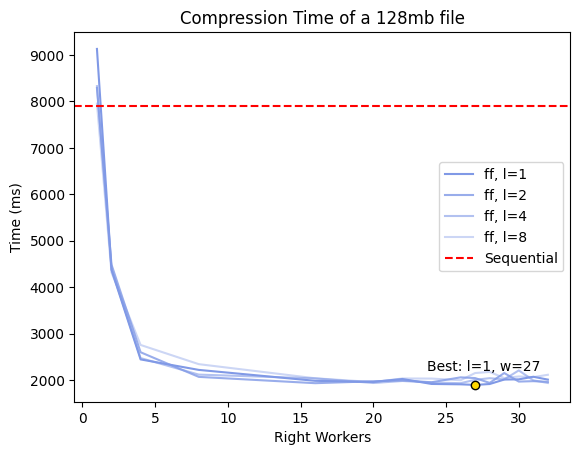

In [336]:
import matplotlib.pyplot as plt
import numpy as np

# Define a base color (grey)
base_color = np.array([0.5, 0.6, 0.9])  # RGB for grey

# Function to adjust the opacity of the base color
def adjust_opacity(color, opacity):
    return np.append(color, opacity)

# Plotting the compression results
fig, ax = plt.subplots()

# Variables to track the best point
best_time = float('inf')
best_l = None
best_w = None

for i, (l, results) in enumerate(average_compression_results.items()):
    ws, times = zip(*results)
    opacity = 1 - (i * 0.2)  # Adjust opacity for each l
    color_with_opacity = adjust_opacity(base_color, opacity)
    ax.plot(ws, times, label=f"ff, l={l}", color=color_with_opacity)
    
    # Find the best point
    min_time = min(times)
    if min_time < best_time:
        best_time = min_time
        best_l = l
        best_w = ws[times.index(min_time)]

# Highlight the best point
ax.scatter(best_w, best_time, color='gold', edgecolor='black', zorder=5)
ax.annotate(f"Best: l={best_l}, w={best_w}", (best_w, best_time), textcoords="offset points", xytext=(6,10), ha='center')

ax.axhline(y=sequential_time_comp_100s, color='r', linestyle='--', label='Sequential')

ax.set_xlabel("Right Workers")
ax.set_ylabel("Time (ms)")
ax.set_title("Compression Time of a 128mb file")
ax.legend()
plt.show()

best time: 1.8923666666666668
best time: 1.1499000000000001
best time: 1.1474000000000002


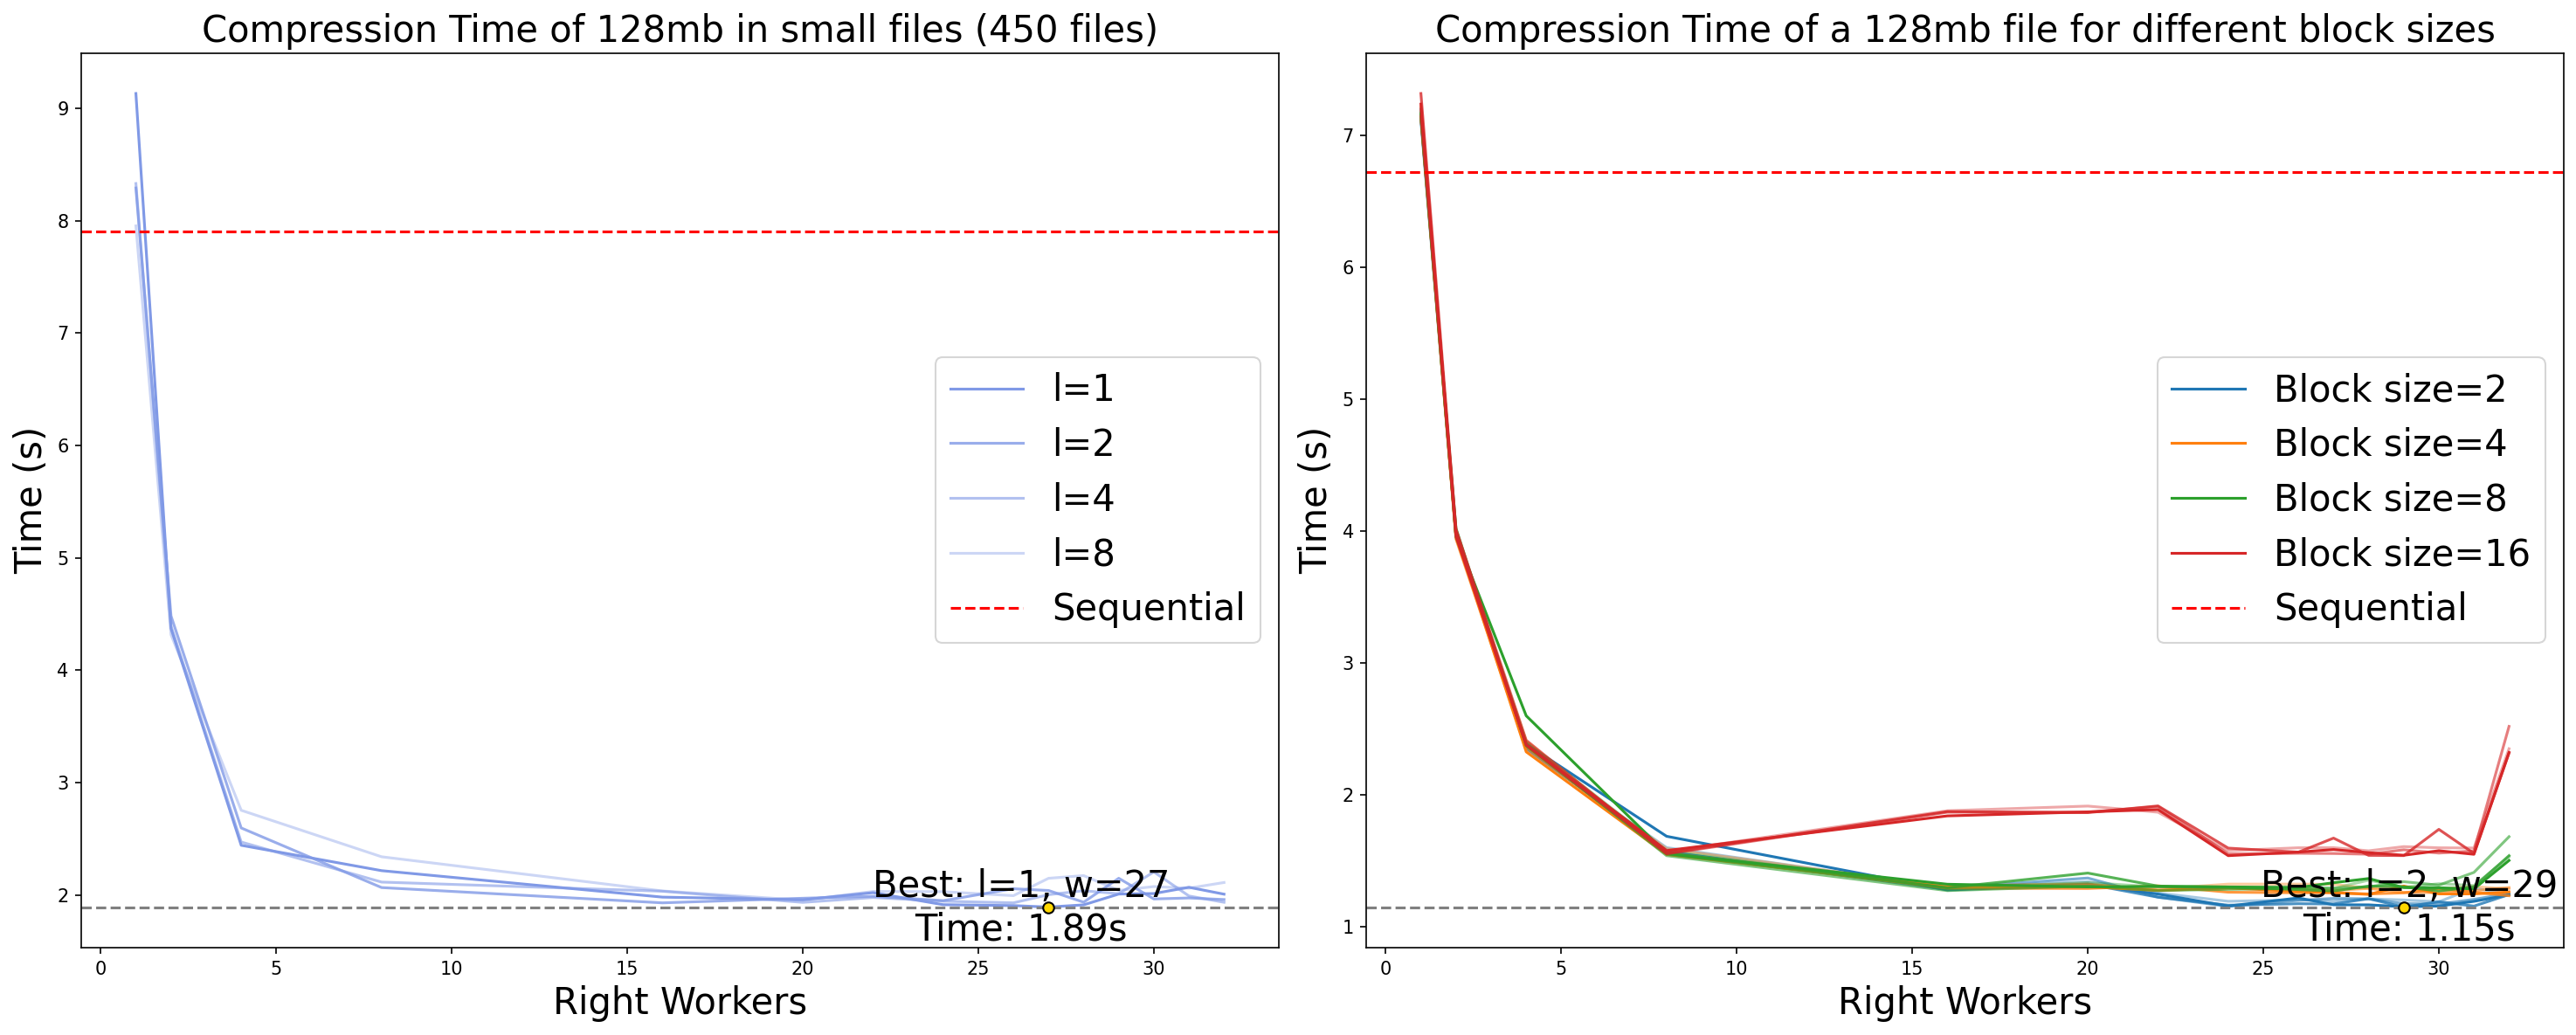

In [342]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming compression_results, sequential_time_comp_100s, sequential_time_comp, blockSizes_avg, and color_map are defined

# Initialize the figure and subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=150)

# Plotting the first set of compression results on ax1
base_color = np.array([0.5, 0.6, 0.9])  # RGB for grey

def adjust_opacity(color, opacity):
    return np.append(color, opacity)

best_time = float('inf')
best_l = None
best_w = None

for i, (l, results) in enumerate(average_compression_results.items()):
    ws, times = zip(*results)
    times = [t / 1000 for t in times]  # Convert times from ms to seconds
    opacity = 1 - (i * 0.2)
    color_with_opacity = adjust_opacity(base_color, opacity)
    ax1.plot(ws, times, label=f"l={l}", color=color_with_opacity)
    
    min_time = min(times)
    if min_time < best_time:
        best_time = min_time
        best_l = l
        best_w = ws[times.index(min_time)]
        print('best time:', best_time)

# Add horizontal line pointing to the best point
ax1.axhline(y=best_time, color='grey', linestyle='--')

# Annotate the best point with its value
ax1.scatter(best_w, best_time, color='gold', edgecolor='black', zorder=5)
ax1.annotate(f"Best: l={best_l}, w={best_w}\nTime: {best_time:.2f}s", 
             (best_w, best_time), textcoords="offset points", xytext=(-15,-18), ha='center', fontsize=20)

ax1.axhline(y=sequential_time_comp_100s / 1000, color='r', linestyle='--', label='Sequential')  # Convert to seconds

ax1.set_xlabel("Right Workers", fontsize=20)
ax1.set_ylabel("Time (s)", fontsize=20)  # Update y-axis label to seconds
ax1.set_title("Compression Time of 128mb in small files (450 files)", fontsize=20)
ax1.legend(fontsize=20)

# Plotting the second set of compression results on ax2
legend_labels = set()
best_time = float('inf')
best_l = None
best_w = None

for idx, (block_size, results) in enumerate(blockSizes_avg.items()):
    compression_results = results.get('compression', {})
    base_color = color_map(idx % 10)

    for i, (l, results) in enumerate(compression_results.items()):
        ws, times = zip(*results)
        times = [t / 1000 for t in times]  # Convert times from ms to seconds
        opacity = 1 - (i * 0.2)
        color_with_opacity = adjust_opacity(base_color[:3], opacity)

        label = f"Block size={block_size}" if block_size not in legend_labels else None
        ax2.plot(ws, times, label=label, color=color_with_opacity)

        legend_labels.add(block_size)

        min_time = min(times)
        if min_time < best_time:
            best_time = min_time
            best_l = l
            best_w = ws[times.index(min_time)]
            print('best time:', best_time)

# Add horizontal line pointing to the best point
ax2.axhline(y=best_time, color='grey', linestyle='--')

# Annotate the best point with its value
ax2.scatter(best_w, best_time, color='gold', edgecolor='black', zorder=5)
ax2.annotate(f"Best: l=2, w=29\nTime: {best_time:.2f}s", 
             (best_w, best_time), textcoords="offset points", xytext=(3,-18), ha='center', fontsize=20)

ax2.axhline(y=sequential_time_comp / 1000, color='r', linestyle='--', label='Sequential')

ax2.set_xlabel("Right Workers", fontsize=20)
ax2.set_ylabel("Time (s)", fontsize=20)
ax2.set_title("Compression Time of a 128mb file for different block sizes", fontsize=20)
ax2.legend(fontsize=20)

# Display the plots
plt.tight_layout()
plt.show()